In [1]:
%matplotlib inline
%load_ext sql

import pandas as pd 
import pylab
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np
import sklearn
from scipy.stats import mode
import psycopg2 as psy
import seaborn as sns
from sqlalchemy import create_engine
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sqlalchemy.engine.url import URL
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
from sklearn.metrics import accuracy_score, silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA 
import matplotlib.patheffects as path_effects

/Users/michael/anaconda/lib/python2.7/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/Users/michael/anaconda/lib/python2.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [2]:
matdf = pd.read_csv('/Users/michael/Downloads/student/student-mat.csv', sep = ';')
matdf['class']=0
pordf = pd.read_csv('/Users/michael/Downloads/student/student-por.csv', sep = ';')
pordf['class']=1

In [3]:
df = pd.concat([matdf,pordf])

In [4]:
df['schoolsup'] = df['schoolsup'].map(lambda x: 1 if x == 'yes' else 0)
df['famsup'] = df['famsup'].map(lambda x: 1 if x == 'yes' else 0)
df['paid'] = df['paid'].map(lambda x: 1 if x == 'yes' else 0)
df['activities'] = df['activities'].map(lambda x: 1 if x == 'yes' else 0)
df['nursery'] = df['nursery'].map(lambda x: 1 if x == 'yes' else 0)
df['higher'] = df['higher'].map(lambda x: 1 if x == 'yes' else 0)
df['internet'] = df['internet'].map(lambda x: 1 if x == 'yes' else 0)
df['romantic'] = df['romantic'].map(lambda x: 1 if x == 'yes' else 0)
df['school'] = df['school'].map(lambda x: 1 if x == 'GP' else 0)
df['sex'] = df['sex'].map(lambda x: 1 if x == 'F' else 0)
df['address'] = df['address'].map(lambda x: 1 if x == 'U' else 0)
df['famsize'] = df['famsize'].map(lambda x: 1 if x == 'GT3' else 0)
df['Pstatus'] = df['Pstatus'].map(lambda x: 1 if x == 'A' else 0)
unique = list(df['Mjob'].unique())
unique_n = {y:x for x, y in enumerate(unique)}
df['Mjob'] = df['Mjob'].apply(lambda x: unique_n[x])
unique = list(df['Fjob'].unique())
unique_n = {y:x for x, y in enumerate(unique)}
df['Fjob'] = df['Fjob'].apply(lambda x: unique_n[x])
unique = list(df['reason'].unique())
unique_n = {y:x for x, y in enumerate(unique)}
df['reason'] = df['reason'].apply(lambda x: unique_n[x])
unique = list(df['guardian'].unique())
unique_n = {y:x for x, y in enumerate(unique)}
df['guardian'] = df['guardian'].apply(lambda x: unique_n[x])
df['grade'] = df['G3']
df = df.drop(['G1','G2','G3'], 1)

In [6]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

from sklearn.cross_validation import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier

# try other ensemble methods (random forest=, extra tree, adaboost, gradient boosting)
rfdt = RandomForestClassifier(random_state=3)
etdt = ExtraTreesClassifier(random_state=3)
abdt = AdaBoostClassifier(random_state=3)
gbdt = GradientBoostingClassifier(random_state=3)

# apply those models to the train set 
result_rfdt = rfdt.fit(X_train,y_train)
result_etdt = etdt.fit(X_train,y_train)
result_abdt = abdt.fit(X_train,y_train)
result_gbdt = gbdt.fit(X_train,y_train)

# print out the accuracy scores 
print "Random Forest Accuracy Score: " + str(result_rfdt.score(X_test,y_test))
print "Extra Tree Accuracy Score: " + str(result_etdt.score(X_test,y_test))
print "Ada Boost Accuracy Score: " + str(result_abdt.score(X_test,y_test))
print "Gradient Boosting Accuracy Score: " + str(result_gbdt.score(X_test,y_test))

Random Forest Accuracy Score: 0.162420382166
Extra Tree Accuracy Score: 0.162420382166
Ada Boost Accuracy Score: 0.156050955414
Gradient Boosting Accuracy Score: 0.178343949045


In [9]:
df.head().T

,0,1,2,3,4
school,1,1,1,1,1
sex,1,1,1,1,1
age,18,17,15,15,16
address,1,1,1,1,1
famsize,1,1,0,1,1
Pstatus,1,0,0,0,0
Medu,4,1,1,4,3
Fedu,4,1,1,2,3
Mjob,0,0,0,1,2
Fjob,0,1,1,2,1


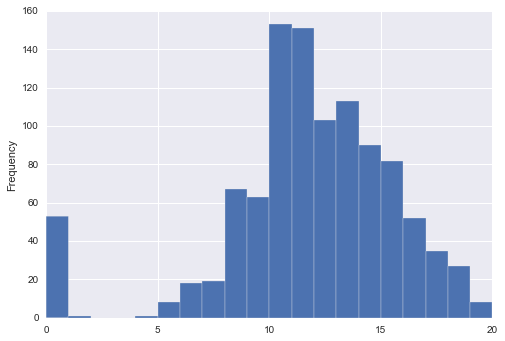

In [11]:
df['grade'].plot(kind='hist', bins=20)

In [23]:
graphdf = df[['grade','Walc','Dalc']]

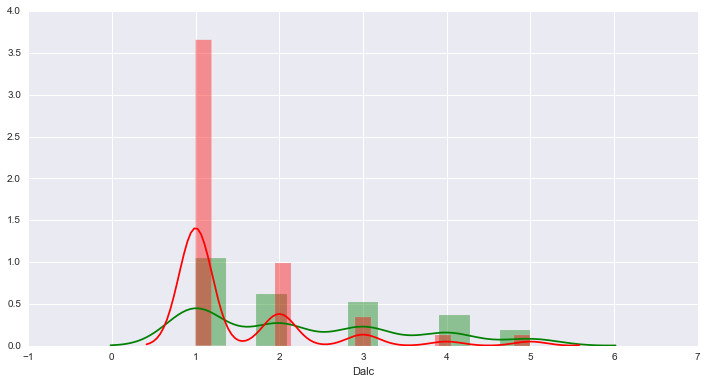

In [26]:
plt.figure(figsize = (12,6))
sns.distplot(df['Walc'], color='green')
sns.distplot(df['Dalc'], color='red')